In [1]:
from gensim.models import word2vec
import logging
logging.basicConfig(format='%(asctime)s : %(levelname)s : %(message)s', level=logging.INFO) 

C:\Users\xwang\anaconda3\envs\NEKG\lib\site-packages\gensim\similarities\__init__.py:15: UserWarning: The gensim.similarities.levenshtein submodule is disabled, because the optional Levenshtein package <https://pypi.org/project/python-Levenshtein/> is unavailable. Install Levenhstein (e.g. `pip install python-Levenshtein`) to suppress this warning.
  warnings.warn(msg)


In [2]:
import pandas as pd
import numpy as np

In [3]:
df = pd.read_csv('data_clinic.txt',sep=',',header=0)

In [4]:
df['TriageNote']=df['TriageNote'].str.lower()

提取出数字

In [5]:
#提取数字
df['number'] = df['TriageNote'].str.extract('(\d+)')

In [6]:
#去掉时间--可以再去除911（电话）
df['number_notime'] = df['number'][df['number'].str.len()!=4]

In [7]:
pd.set_option('display.max_rows', None)

In [8]:
df_new=df['number_notime'].dropna(axis=0,how='any')

In [9]:
df

DISPOSITION  CTAS EMS PainScale  Temp  Heart.Rate  Resp.Rate  SystolicBP  \
0              D     2   N       NaN  36.5        75.0       15.0       105.0   
1              D     3   Y       NaN  35.8       105.0       20.0       118.0   
2              D     2   Y       NaN  35.4        72.0       20.0       114.0   
3              D     2   Y       NaN  36.1       100.0       16.0       126.0   
4              D     2   N       NaN   NaN        97.0       20.0       115.0   
5              A     2   Y       NaN  37.0       144.0       26.0       120.0   
6              A     2   Y       NaN  37.6       106.0       16.0       142.0   
7              D     3   N       NaN  37.2        82.0       18.0       123.0   
8              D     2   Y       NaN  37.4        57.0       16.0       109.0   
9              D     2   N       NaN  36.6        53.0       18.0       149.0   
10             A     1   Y       NaN   NaN         NaN        NaN         NaN   
11             D     2   Y       NaN  36.5        82.0       18.0       139.0   
12             A     2   Y       NaN  36.6       114.0       20.0       134.0   
13             A     2   Y       NaN  37.8       120.0       18.0       100.0   
14             A     3   N       NaN  37.0        69.0       18.0       117.0   
15             A     2   N       NaN  36.0       114.0       24.0        76.0   
16             A     3   Y       NaN  36.6        70.0       14.0       184.0   
17             A     3   Y       NaN  37.4        90.0       18.0       125.0   
18             D     1   Y       NaN  36.2        52.0       16.0       113.0   
19             A     2   Y       NaN  35.7       122.0       38.0       131.0   
20             A     2   Y       NaN  36.0        85.0       26.0       160.0   
21             A     2   Y       NaN  35.6        62.0       14.0       162.0   
22             D     3   N       NaN   NaN        76.0       18.0       151.0   
23             D     2   N       NaN  35.8       132.0       18.0       135.0   
24             A     2   Y       NaN  36.2       120.0       16.0         NaN   
25             D     2   Y       NaN   NaN       105.0       20.0       148.0   
26             D     2   Y       NaN  37.2        97.0       18.0       110.0   
27             D     3   Y       NaN  36.3        44.0       18.0       108.0   
28             D     1   Y       NaN   NaN        96.0       20.0       107.0   
29             D     2   Y       NaN  36.4       101.0       18.0       111.0   
30             A     2   Y       NaN  38.2       114.0       22.0       129.0   
31             A     2   Y       NaN   NaN       110.0       20.0       147.0   
32             D     1   Y       NaN  36.8       109.0       18.0       124.0   
33             A     2   Y       NaN  37.8        98.0       16.0       131.0   
34             A     2   Y       NaN   NaN       106.0       20.0       135.0   
35             D     2   Y       NaN  36.5        74.0       16.0       102.0   
36             A     2   Y       NaN  36.8       120.0       20.0       129.0   
37             A     2   Y       NaN  37.1       100.0       16.0       106.0   
38             A     1   Y       NaN   NaN        97.0        NaN       136.0   
39             D     3   Y       NaN  36.4        64.0       16.0       148.0   
40             A     2   Y       NaN  36.0        74.0       28.0       120.0   
41             D     3   N       NaN  36.4       100.0       16.0        88.0   
42             A     2   Y       NaN   NaN        57.0       16.0       129.0   
43             A     2   Y       NaN  36.6        82.0       18.0       132.0   
44             A     3   Y       NaN  36.8        72.0       18.0       152.0   
45             A     1   Y       NaN   NaN         NaN        NaN         NaN   
46             A     3   N       NaN  36.5        96.0       16.0       115.0   
47             D     1   Y       NaN  36.9        73.0       18.0       131.0   
48             D     2   Y       NaN

处理词向量

NEKG part

In [10]:
import ampligraph
from ampligraph.latent_features import TransE
import matplotlib.pyplot as plt
from sklearn.manifold import TSNE

C:\Users\xwang\anaconda3\envs\NEKG\lib\site-packages\tensorflow\python\framework\dtypes.py:516: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint8 = np.dtype([("qint8", np.int8, 1)])
C:\Users\xwang\anaconda3\envs\NEKG\lib\site-packages\tensorflow\python\framework\dtypes.py:517: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_quint8 = np.dtype([("quint8", np.uint8, 1)])
C:\Users\xwang\anaconda3\envs\NEKG\lib\site-packages\tensorflow\python\framework\dtypes.py:518: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint16 = np.dtype([("qint16", np.int16, 1)])
C:\Users\xwang\anaconda3\envs\NEKG\lib\site-packages\tensorflow\python\frame

In [11]:
# Knowledge Graph Construction.
def graph_construction(start, stop, step):
    kg = pd.DataFrame()
    kg['h'] = [i for i in np.arange(start, stop, step)]
    kg['r'] = ['isLessThan'] * int((stop-start) / step)
    kg['t'] = [i for i in np.arange(step, stop+1, step)]
    kg["h"] = kg.h.values.astype(str)
    kg["t"] = kg.t.values.astype(str)
    return kg

In [12]:
start = 0
stop = 1000
step = 5
kg_df = graph_construction(start, stop, step)
kg_df.head()

h           r   t
0   0  isLessThan   5
1   5  isLessThan  10
2  10  isLessThan  15
3  15  isLessThan  20
4  20  isLessThan  25

In [13]:
##kg embedding
kg_array = kg_df.to_numpy().astype(str)
model = TransE(epochs=200, k=300, verbose=True)
model.fit(kg_array)

Average TransE Loss:   1.717522: 100%|██████████| 200/200 [00:35<00:00,  5.65epoch/s]


In [14]:
# Dimensionality reduction using t-SNE---visualize the embedding
embeddings = model.get_embeddings(entities=[str(j) for j in np.arange(start, stop+1, step)], embedding_type='entity')
embeddings = np.asarray(embeddings, dtype='float64')
embeddings_tSNE = TSNE(n_components=2).fit_transform(embeddings)
embeddings_tSNE = pd.DataFrame(embeddings_tSNE, columns=['tSNE_1', 'tSNE_2'])
embeddings_tSNE['magnitude'] = [i for i in range(start, stop+1, step)]
embeddings_tSNE.head()

tSNE_1     tSNE_2  magnitude
0  11.209297  10.818791          0
1  11.062130  10.983754          5
2  11.102901  10.584949         10
3  10.805273  11.088210         15
4  10.796498  10.430558         20

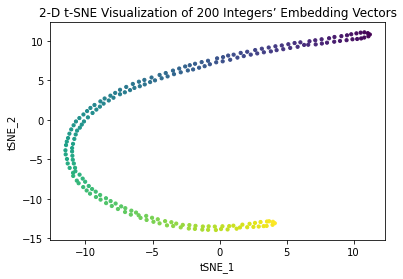

In [15]:
# Visualize the embedding vectors in 2-D space.
plt.scatter(embeddings_tSNE.tSNE_1, embeddings_tSNE.tSNE_2, c=embeddings_tSNE.magnitude, s=10)
plt.title('2-D t-SNE Visualization of 200 Integers’ Embedding Vectors')
plt.xlabel('tSNE_1')
plt.ylabel('tSNE_2')
plt.show()

In [16]:
# Measure the similarity between numbers--处理oov number
def cal_sim(x1, x2, x3):
    return (x2-x1)/(x3-x1)

In [17]:
# Obtain embedding vectors for OOVs.
OOVs = range(0, 1000)
OOV_embeddings = []
for i in OOVs:
    for j in np.arange(start, stop+1, step):
        if i < j:
            upper = j
            lower = j-step
            e1 = model.get_embeddings(str(lower), embedding_type='entity')
            e2 = model.get_embeddings(str(upper), embedding_type='entity')
            s2 = cal_sim(lower, i, upper)
            s1 = 1-s2            
            OOV_embeddings.append(e1 * s1 + e2 * s2)
            break

In [18]:
# Dimensionality reduction using t-SNE.
OOV_embeddings = np.asarray(OOV_embeddings, dtype='float64')
OOV_embeddings_tSNE = TSNE(n_components=2).fit_transform(OOV_embeddings)
OOV_embeddings_tSNE = pd.DataFrame(OOV_embeddings_tSNE, columns=['tSNE_1', 'tSNE_2'])
OOV_embeddings_tSNE['magnitude'] = OOVs
OOV_embeddings_tSNE.head()

tSNE_1     tSNE_2  magnitude
0  19.513723  59.656948          0
1  19.414347  59.420166          1
2  19.331554  59.067783          2
3  19.256273  58.709080          3
4  19.228638  58.310478          4

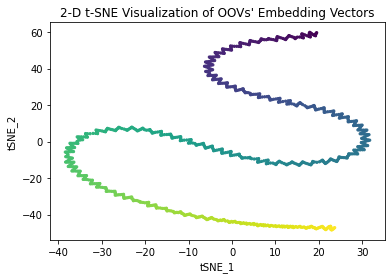

In [19]:
# Visualize the embedding vectors of OOVs in 2-D space.
plt.scatter(OOV_embeddings_tSNE.tSNE_1, OOV_embeddings_tSNE.tSNE_2, c=OOV_embeddings_tSNE.magnitude, s=5)
plt.title('2-D t-SNE Visualization of OOVs\' Embedding Vectors')
plt.xlabel('tSNE_1')
plt.ylabel('tSNE_2')
plt.show()

In [21]:
OOV_embeddings.shape#0到999的embedding

(1000, 300)

In [22]:
np.save("nekg 1-999 300d.npy",OOV_embeddings)